## Numpy
### Assignments

1. Strides, Views
   
   Generate a 5×4 array A containing consecutive natural numbers.
   Create array B as a view of A.
   Modify the strides of B so that B becomes the transpose of A (B = A.T). Use B.strides = ? to achieve this.
   Calculate how many bytes need to be traversed in memory to access the element with the value 7 in both arrays.
2. Broadcasting

   Generate 10,000 points in a 1,000-dimensional space.
   Using broadcasting, compute the matrix of Euclidean distances between all pairs of points.
   Compare the execution time of this approach with a triple for-loop implementation.
3. Copies and Views

   Generate a 3×3 array A containing integers from 1 to 9.
   Perform the following experiments and answer the questions:
   - Create array B as a copy of A using np.copy(), and array C as a view of A using np.view().
   Modify A[0,0] to 100 in the original array A. Then modify C[2,2] to 200 in C.
   Observe and explain the changes in B, C, and A. Why did some arrays change while others didn’t?
   - Create a view D of A with an added dimension (for example, using np.newaxis in the appropriate position) and observe how the data changes.
   Modify a row in C (for example, C[1,:]) and check if the changes affect A. Then, check whether modifying B affects A.
4. Subclassing

   Implement a custom subclass MyArray, inheriting from np.ndarray.
   Add a method norm() that computes the matrix norm using a selected norm type.
   Verify the correctness of MyArray and the norm() method for different values.
5. Stride Tricks

   Create an array as shown on the left side of the diagram. Using stride_tricks, transform it into the array on the right side of the diagram by swapping the top-right quadrant with the bottom-left.
   ![task](Images/ex_np_as_strided.png)

## Assignment 1


In [11]:
import numpy as np
from numpy.lib import stride_tricks
## NUMPY

## assignment 1
print()
print("assignment 1")
A = np.arange(1, 21).reshape(5, 4)
B = A.view()
B.strides = A.strides[::-1]
print(f"A.strides {A.strides}")
print(f"B.strides {B.strides}")
print(A[1,2])
print(B[2,1])

offset=sum(A.strides * np.array((1,2)))
print(offset/A.itemsize)

offset=sum(B.strides * np.array((2,1)))
print(offset/B.itemsize)

## 1 * 32 + 2 * 8 = 42 = 2 * 8 + 1 * 32
## in both cases 48 bits will be transersed


assignment 1
A.strides (32, 8)
B.strides (8, 32)
7
7
6.0
6.0


## Assignment 3



In [6]:
A = np.arange(1, 10).reshape(3,3)
B = A.copy()
C = A.view()

A[0,0] = 100
C[2,2] = 200

print(f"A:")
print(A)
print(f"B:")
print(B)
print(f"C:")
print(C)

## C is just view of A so they are allocated in same memory, changes are common
## B is a copy (allocated memory) so changes in A doesnt implicate change in B

D = A[np.newaxis, :]
print(f"D: ")
print(D)
print(f"A.shape: {A.shape}")
print(f"D.shape: {D.shape}")

C[1, :] = [0,0,0]
print(f"A:")
print(A)

B[0, :] = [0,0,0]
print(f"A:")
print(A)

## Modification done in C couse same changes in A (same memory), but with B behaviour is opposite


A:
[[100   2   3]
 [  4   5   6]
 [  7   8 200]]
B:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
C:
[[100   2   3]
 [  4   5   6]
 [  7   8 200]]
D: 
[[[100   2   3]
  [  4   5   6]
  [  7   8 200]]]
A.shape: (3, 3)
D.shape: (1, 3, 3)
A:
[[100   2   3]
 [  0   0   0]
 [  7   8 200]]
A:
[[100   2   3]
 [  0   0   0]
 [  7   8 200]]


## Assignment 4

In [ ]:
class MyArray(np.ndarray):
    def __new__(cls, arr):
        return np.asarray(arr).view(cls)

    def norm(self, type):
        return np.linalg.norm(self, ord=type)

H = MyArray([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
G = MyArray([[0, 0, 0], [1, 1, 1], [2, 2, 2]])

print(H.norm(1))
print(G.norm(2))


9.0
3.8729833462074166


## Pandas - Dask

### Assignments:

1. Try to explain the histogram of the relative ratings (especially the seasonality that may be seen in the histogram).
2. Make a sequence of products rated by each user, but consider only the products that were rated more than 50 times between 8 a.m. and 4 p.m.
3. Evaluate the mean of ratings given by each user in successive hours during the day, but consider only the products that were in the 3rd group of the stability of product ratings.

## Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
N = 100000

data_ = np.random.randint(1000, size=(N, 4))

df = pd.DataFrame(data_, columns=['time', 'uid', 'pid', 'rating'])
df['time'] = np.random.randint(24 * 60 * 60, size=(N))
df['time'] = pd.to_datetime('2025-01-01') + pd.to_timedelta(1e9 * df['time'])
df['rating'] = np.random.randint(10, size=(N))


,time,uid,pid,rating,product_mean_rating
0,2025-01-01 01:59:46,179,557,1.152941,3.847059
1,2025-01-01 03:39:12,401,736,3.883495,4.116505
2,2025-01-01 02:16:07,680,147,-4.915789,4.915789
3,2025-01-01 07:12:33,367,867,-1.715686,4.715686
4,2025-01-01 01:22:25,952,800,-1.238095,4.238095
...,...,...,...,...,...
99995,2025-01-01 14:23:40,84,266,-4.478261,4.478261
99996,2025-01-01 19:11:55,459,310,0.359223,4.640777
99997,2025-01-01 04:22:25,38,744,3.543478,4.456522
99998,2025-01-01 16:24:28,273,627,2.322222,4.677778


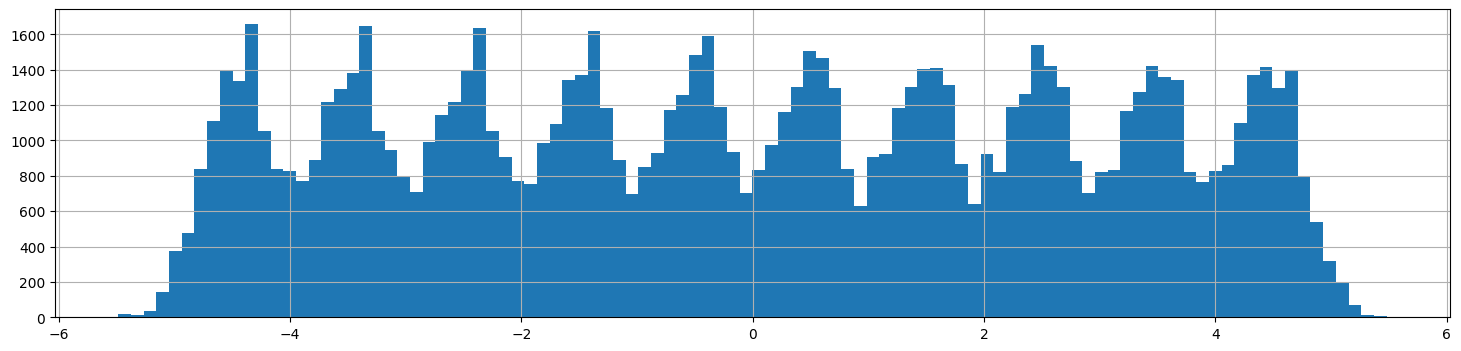

In [5]:
df2 = df.groupby('pid')['rating'].mean().rename('product_mean_rating').to_frame()

df_p = df.join(df2['product_mean_rating'], how='left', on='pid')
df_p['rating'] = df_p['rating'] - df_p['product_mean_rating']
df_p['rating'].hist(figsize=(18, 4), bins=100)
df_p

## There could be different eg. types of games, with some types generally receiving higher ratings than others. In this case, the histogram would represent the superposition of 10 distributions, each corresponding to a different game type.

## Assignment 2

In [ ]:
df_ = df.set_index('time').between_time('8:00', '16:00')['pid'].value_counts()
pids = df_[df_ > 50]
result = df[df['pid'].isin(pids.index)].groupby('uid')['pid'].agg(list)

result

,pid
uid,
2,[32]
7,[927]
19,[927]
26,[32]
29,[927]
...,...
975,[927]
979,[927]
980,[927]


## Assignment 3

uid  hour
0    0       9.0
     1       6.0
     3       0.0
     5       1.5
     9       5.0
            ... 
999  12      5.0
     13      4.0
     16      3.0
     17      4.0
     18      9.0
Name: rating, Length: 12138, dtype: float64

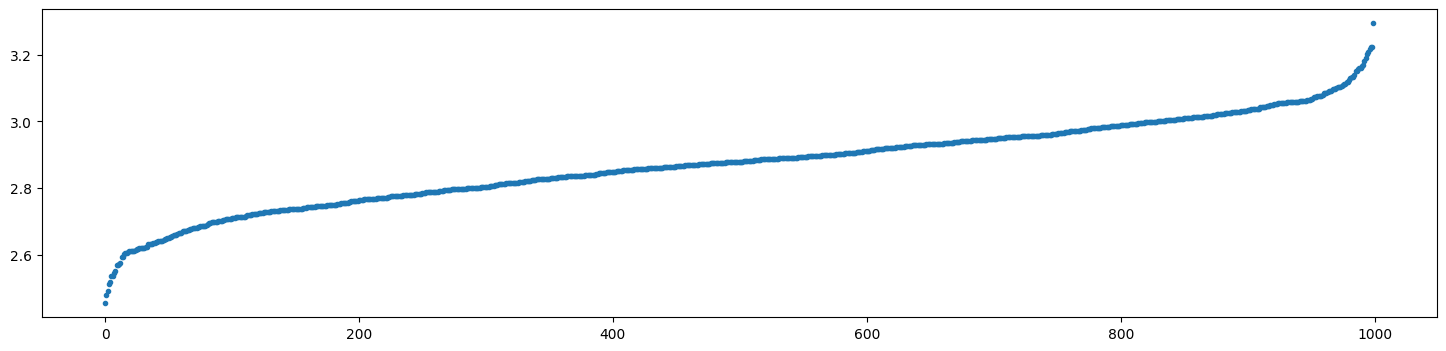

In [ ]:
df_ = df.groupby('pid')['rating'].std().rename('product_rating_std').to_frame()

df_['product_rating_std'].sort_values().reset_index(drop=True).plot(figsize=(18, 4), linestyle='', marker='.')

df_3 = pd.cut(df_['product_rating_std'], bins=10, labels=False).to_frame()
pids = df_3[df_3 == 3].dropna()
df['hour'] = df['time'].dt.hour


result = df[df['pid'].isin(pids.index)].groupby(['uid', 'hour'])['rating'].mean()
result

## SciKit - Optuna

### Assignments:

1. Train all the models on the train dataset (`Pipeline.fit()`), choose the model with the best parameters setting using the validation dataset (`GridSearchCV.fit()`), and finally test the best model on the test dataset (`GridSearchCV.best_estimator_.fit()`). It requires refactoring the part of code with the `train_test_split()` function (it should be run twice: first, for splitting the entire dataset into (temporary) train and test datasets, and second, for splitting the (temporary) train dataset into train and validation datasets).

2. Try to use your own scoring function in the grid search (`GridSearchCV(scoring=my_own_scoring)`). As `Pipeline.score()` uses the `score()` method of the final estimator in the pipeline, being `SVC.score()` in our example, it computes the mean accuracy of the classifier. Our dataset may be imbalanced, i.e. one class may occur more frequently than the other, so it would be better to replace the mean accuracy with the F1 score.

### Assignment 1 and 2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer

%matplotlib inline

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
X_train, X_vali, y_train, y_vali = train_test_split(X_temp, y_temp, test_size=0.25, train_size=0.75)
print(f"X_train: {len(X_train)}  X_test: {len(X_test)}  X_vali: {len(X_vali)}")

pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('svc', SVC(C=1.0, kernel='rbf'))
])

gs_parameters = {
    'svc__C': [0.25, 0.50, 0.75, 1, 5, 10, 15, 20, 25],
    'svc__kernel': ('linear', 'rbf')
}

X_gs = np.concatenate([X_train, X_vali])
y_gs = np.concatenate([y_train, y_vali])


test_fold = np.zeros(len(X_temp))
test_fold[len(X_train): len(X_temp) ] = -1
ps = PredefinedSplit(test_fold=test_fold)

## assigment 1
gs = GridSearchCV(pipeline, gs_parameters, cv=ps)

## assigment 2
# gs = GridSearchCV(pipeline, gs_parameters, cv=ps, scoring='f1')

## alternative:
# def custom_f1(y_true, y_pred):
#     return f1_score(y_true, y_pred)
# score = make_scorer(custom_f1, greater_is_better=True)
# gs = GridSearchCV(pipeline, gs_parameters, cv=ps, scoring=score)



gs.fit(X_gs, y_gs)

best_model = gs.best_estimator_
best_model = best_model.fit(X_temp, y_temp)
score_train = best_model.score(X_test, y_test)
print(score_train)




X_train: 562  X_test: 250  X_vali: 188
0.884
